In [41]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [85]:
@jit(nopython=True)
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y
@jit(nopython=True)
def get_ZE12(Etheta):
    ''' get theta and return r and theta'''
    E1 = Etheta
    E2 = E1**2
    Z1,Z2 = np.mean(E1),np.mean(E2)
    return Z1,Z2
# @jit(nopython=True)
# def Kuramoto_MF_CHIMERA(Theta,t,N,omega,K2,EA):
#     # print("Case m = 0")
#     ET = np.exp(1j*Theta)
#     Z1,Z2 =  get_ZE12(ET)
#     # EA = np.exp(-1j*alpha)
#     ET = np.conjugate(ET)
#     # dtheta  = omega + K2*r*r*np.sin(2*(psi-theta)-alpha) -K2*r/N*np.sin((psi-theta)-alpha) - K2*r/N*np.sin((psi-theta)-alpha) - K2*r2/N*np.sin(psi2-2*theta-alpha)
#     dtheta  = omega + (((K2*EA*(Z1**2-Z2/N))*ET - (2*K2*Z1*EA/N))*ET+2*K2*EA/N/N).imag
#     # dtheta  = omega + K2*((r*r*np.exp(1j*(2*psi-alpha)) - r2/N*np.exp(1j*(psi2-alpha))*np.exp(-1j*theta) - r/N*np.sin((psi-theta)-alpha))*np.exp(-1j*theta)).imag
#     return dtheta


@jit(nopython=True)
def Kuramoto_MF_CHIMERA(Theta,t,N,omega,K2,alpha):
    # print("Case m = 0")
    ET = np.exp(1j*Theta)
    Z1,Z2 =  get_ZE12(ET)
    A = np.exp(-1j*alpha)
    ET = np.conjugate(ET)
    # dtheta  = omega + K2*r*r*np.sin(2*(psi-theta)-alpha) -K2*r/N*np.sin((psi-theta)-alpha) - K2*r/N*np.sin((psi-theta)-alpha) - K2*r2/N*np.sin(psi2-2*theta-alpha)
    dtheta  = omega + (((K2*A*(Z1**2-Z2/N))*ET - (2*K2*Z1*A/N))*ET+2*K2*A/N/N).imag
    # dtheta  = omega + K2*((r*r*np.exp(1j*(2*psi-alpha)) - r2/N*np.exp(1j*(psi2-alpha))*np.exp(-1j*theta) - r/N*np.sin((psi-theta)-alpha))*np.exp(-1j*theta)).imag
    return dtheta

In [43]:
N =  1000
Theta = np.linspace(0,np.pi,N)
ET = np.exp(1j*Theta)

In [44]:
alpha = 0.1
omega = 0
K2 = 1

In [45]:
Z1,Z2 =  get_ZE12(ET)
A = np.exp(-1j*alpha)
ET = np.conjugate(ET)
# dtheta  = omega + K2*r*r*np.sin(2*(psi-theta)-alpha) -K2*r/N*np.sin((psi-theta)-alpha) - K2*r/N*np.sin((psi-theta)-alpha) - K2*r2/N*np.sin(psi2-2*theta-alpha)
%timeit dtheta  = omega + (((K2*A*(Z1**2-Z2/N))*ET - (2*K2*Z1*A/N))*ET+2*K2*A/N/N).imag
%timeit dtheta  = omega + ((K2*A*(Z1**2-Z2/N))*ET*ET - (2*K2*Z1*A/N)*ET+2*K2*A/N/N).imag
%timeit dtheta  = omega + (K2*A*(((Z1**2-Z2/N))*ET - (2*Z1/N))*ET+2/N/N).imag
%timeit A = np.exp(-1j*alpha)
%timeit A/N/N

4.51 µs ± 92.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
5.25 µs ± 51.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
5.49 µs ± 229 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
339 ns ± 1.73 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
68.7 ns ± 3.43 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


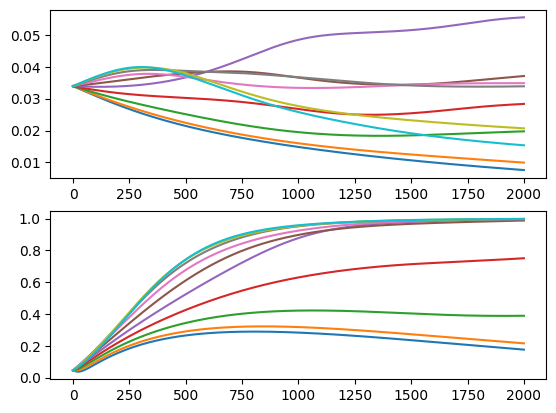

In [82]:
Theta = np.random.uniform(0,2*np.pi,N)
# Theta = np.linspace(0,np.pi,N)
t = np.arange(0,2000,0.1)

alphas =  np.linspace(0,np.pi,10)
for alpha in alphas:
    sol_MF = RK4(Kuramoto_MF_CHIMERA,Theta,t,args=(N,omega,K2,alpha))
    rabs2_MF = np.mean(np.exp(2*sol_MF[:,:].T*1j),axis=0)
    rabs1_MF = np.mean(np.exp(sol_MF[:,:].T*1j),axis=0)

    # rabs2_ = rabs2__[len(t)//2:]
    r2_MF = np.abs(rabs2_MF)
    r1_MF = np.abs(rabs1_MF)
    
    plt.subplot(211)
    plt.plot(t,r1_MF)
    plt.subplot(212)
    plt.plot(t,r2_MF)


In [73]:
sol_MF.shape

(20000, 1000)

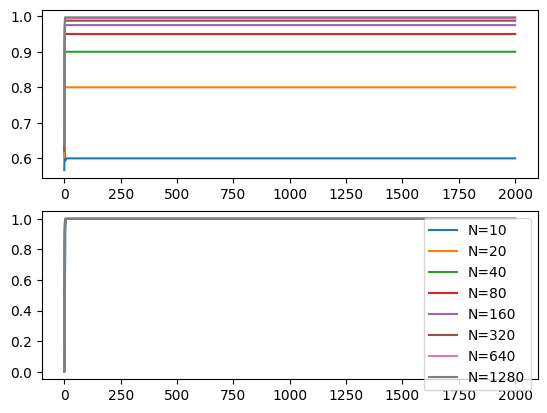

In [123]:
Ns = [10,20,40,80,160,320,640,1280]

alpha = 0.
r1_s = []
r2_s = []
for N in Ns:
    # Theta = np.random.uniform(0,np.pi,N)
    Theta = np.linspace(0,np.pi,N)
    sol_MF = RK4(Kuramoto_MF_CHIMERA,Theta,t,args=(N,omega,K2,alpha))
    rabs2_MF = np.mean(np.exp(2*sol_MF[:,:].T*1j),axis=0)
    rabs1_MF = np.mean(np.exp(sol_MF[:,:].T*1j),axis=0)

    # rabs2_ = rabs2__[len(t)//2:]
    r2_MF = np.abs(rabs2_MF)
    r1_MF = np.abs(rabs1_MF)
    R1 = np.mean(r1_MF[-500])
    R2 = np.mean(r2_MF[-500])
    r1_s.append(R1)
    r2_s.append(R2)
    plt.subplot(211)
    plt.plot(t,r1_MF)
    plt.subplot(212)
    plt.plot(t,r2_MF,label=f'N={N}')

plt.legend()

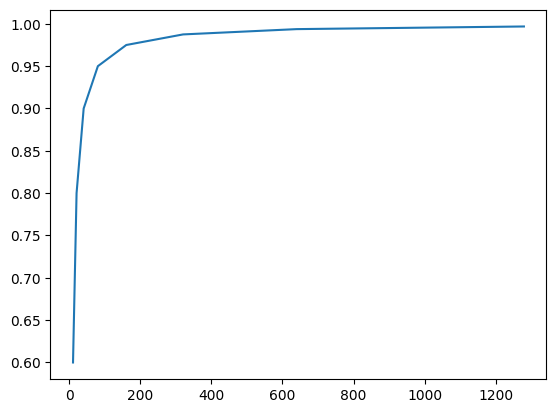

In [132]:
plt.plot(Ns,np.array(r1_s))
# plt.plot(Ns,r2_s)
# plt.loglog()
# plt.grid()
# plt.xscale('log')
